In [231]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [232]:
#Creating and empty array

PrimaryArray=[]
SecendoryArray=[]

In [233]:
# Check if the file is open
if os.access("tmdb_5000_movies.csv", os.R_OK):
    df = pd.read_csv("tmdb_5000_movies.csv")
else:
    print("File is open or you don't have permission to access it.")
df = pd.read_csv("tmdb_5000_movies.csv")

In [234]:
print(df.tail())

      budget                                             genres  \
4798  220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4799    9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
4800       0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
4801       0                                                 []   
4802       0                [{"id": 99, "name": "Documentary"}]   

                                               homepage      id  \
4798                                                NaN    9367   
4799                                                NaN   72766   
4800  http://www.hallmarkchannel.com/signedsealeddel...  231617   
4801                        http://shanghaicalling.com/  126186   
4802                                                NaN   25975   

                                               keywords original_language  \
4798  [{"id": 5616, "name": "united states\u2013mexi...                es   
4799                                    

In [235]:
print(df.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


In [236]:
df['overview'] = df['overview'].fillna(' ')
df['tagline'] = df['tagline'].fillna(' ')
df['runtime'].fillna(df['runtime'].median(), inplace=True)

print(df.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_18900\931002391.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].fillna(df['runtime'].median(), inplace=True)


In [237]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Perform min-max scaling on 'runtime' and 'imdb_votes' columns
df[['runtime', 'vote_count']] = scaler.fit_transform(df[['runtime', 'vote_count']])

print(df.head())

      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "nam

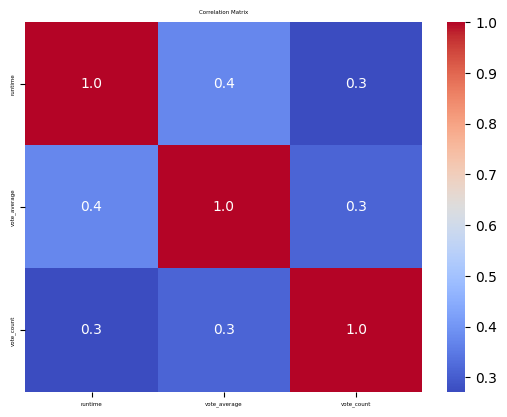

In [238]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['runtime', 'vote_average', 'vote_count']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".01f")
plt.title('Correlation Matrix', fontsize=4)
plt.xticks(fontsize=4)
plt.yticks(fontsize=4)
plt.show()


In [239]:
import json
def transform(column):
    array2 = []
    # [{"id": 1562, "name": "hostage"}, {"id": 2343, "name": "magic"}, {"id": 2673, "name": "horse"}, {"id": 3205, "name": "fairy tale"}, {"id": 4344, "name": "musical"}, {"id": 7376, "name": "princess"}, {"id": 10336, "name": "animation"}, {"id": 33787, "name": "tower"}, {"id": 155658, "name": "blonde woman"}, {"id": 162219, "name": "selfishness"}, {"id": 163545, "name": "healing power"}, {"id": 179411, "name": "based on fairy tale"}, {"id": 179431, "name": "duringcreditsstinger"}, {"id": 215258, "name": "healing gift"}, {"id": 234183, "name": "animal sidekick"}]
    for index, row in df.iterrows():
        keywords = row[column]
        array = json.loads(keywords)
        str = ""
        for i in array:
            str += i["name"] + ", "
        array2.append(str)
    df[column] = array2
    print(df[column])

In [240]:

transform("keywords")
transform("genres")
transform("spoken_languages")

0       culture clash, future, space war, space colony...
1       ocean, drug abuse, exotic island, east india t...
2       spy, based on novel, secret agent, sequel, mi6...
3       dc comics, crime fighter, terrorist, secret id...
4       based on novel, mars, medallion, space travel,...
                              ...                        
4798    united states–mexico barrier, legs, arms, pape...
4799                                                     
4800    date, love at first sight, narration, investig...
4801                                                     
4802            obsession, camcorder, crush, dream girl, 
Name: keywords, Length: 4803, dtype: object
0       Action, Adventure, Fantasy, Science Fiction, 
1                        Adventure, Fantasy, Action, 
2                          Action, Adventure, Crime, 
3                    Action, Crime, Drama, Thriller, 
4                Action, Adventure, Science Fiction, 
                            ...                 

In [241]:
from sklearn.feature_extraction.text import TfidfVectorizer
def matrix_creator(column):
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(df[column])

    return(tfidf_matrix)

In [242]:
tfidf_matrix=matrix_creator('genres')
tfidf_matrix2=matrix_creator('keywords')
tfidf_matrix3=matrix_creator('spoken_languages')
tfidf_matrix4=matrix_creator('overview')

In [243]:
from sklearn.metrics.pairwise import linear_kernel
def cosine_sim_generator(matrix):
    # Compute the cosine similarity matrix
    cosine_sim = linear_kernel(matrix, matrix)
    return(cosine_sim)

In [244]:
cosine_sim = cosine_sim_generator(tfidf_matrix)
print(cosine_sim)
cosine_sim2 = cosine_sim_generator(tfidf_matrix2)
print(cosine_sim2)
cosine_sim3 = cosine_sim_generator(tfidf_matrix3)
print(cosine_sim3)
cosine_sim4 = cosine_sim_generator(tfidf_matrix4)
print(cosine_sim4)


[[1.         0.74526744 0.42944732 ... 0.         0.         0.        ]
 [0.74526744 1.         0.5762325  ... 0.         0.         0.        ]
 [0.42944732 0.5762325  1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
[[1.         0.0128521  0.         ... 0.02125933 0.         0.        ]
 [0.0128521  1.         0.         ... 0.02621901 0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.02125933 0.02621901 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
[[1.         0.28355137 0.49093995 ... 0.28355137 0.28355137 0.28355137]
 [0.28355137 1.         0.1392067  ... 

In [245]:
# Create a reverse mapping of movie titles to index
indices = pd.Series(df.index, index=df['title']).drop_duplicates()
print(indices)

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64


In [246]:
def getRecommendation(title, cosine_sim,count):
    
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:(count+1)]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Get the movie titles of the top 10 most similar movies
    recommended_movies = df['title'].iloc[movie_indices]

    # Store movie titles in an array (list or numpy array)
    movie_titles_array = recommended_movies.tolist()  # Using list
    # movie_titles_array = np.array(recommended_movies)  # Using numpy array
    
    return movie_titles_array

# Example usage



In [252]:

PrimaryArray+=getRecommendation("Evil Words",cosine_sim,10)
PrimaryArray+=getRecommendation("Evil Words",cosine_sim2,10)
SecendoryArray+=getRecommendation("Evil Words",cosine_sim3,100)
SecendoryArray+=getRecommendation("Evil Words",cosine_sim4,100)

In [248]:
print(PrimaryArray)

['The Relic', 'From Hell', 'The Ninth Gate', 'Mirrors', 'Case 39', 'Hide and Seek', 'I Still Know What You Did Last Summer', 'Orphan', 'Ghost Ship', 'The Stepfather', 'The Life Before Her Eyes', 'The Cry of the Owl', 'Perrier’s Bounty', 'London to Brighton', 'Mercy Streets', 'The Dead Zone', 'Frenzy', 'Halloween', "Don't Say a Word", 'The Contender']


In [249]:
print(SecendoryArray)

['Jumper', 'Evolution', 'Oceans', 'Up Close & Personal', 'Micmacs', 'A Monster in Paris', 'Little Nicholas', 'Little White Lies', 'The Visitors II: The Corridors of Time', 'Dragon Hunters', 'The Artist', 'See Spot Run', 'Welcome to the Sticks', 'District B13', 'The Diving Bell and the Butterfly', 'Wild Grass', 'The Widow of Saint-Pierre', 'Ernest & Celestine', 'The Bélier Family', 'Elsa & Fred', 'Amour', 'Barbecue', 'The Girl on the Train', '8 Women', 'Betty Fisher and Other Stories', 'The Visitors', 'The Flower of Evil', 'The Chorus', 'Le Havre', 'Irreversible', 'Camping Sauvage', 'The Names of Love', "Mozart's Sister", 'Silent Movie', 'Holy Motors', 'The Class', 'Evil Words', 'Subway', 'One to Another', 'Mississippi Mermaid', 'The Blue Room', 'Desire', 'Elza', 'The Country Doctor', "When the Cat's Away", 'Pierrot le Fou', 'The Case of the Grinning Cat', 'The Married Woman', 'Spider-Man 3', 'G.I. Joe: The Rise of Cobra', 'Harry Potter and the Goblet of Fire', 'The Matrix Revolutions',

In [250]:
#Keeping The items that are also in Array1
SecendoryArray = [item for item in SecendoryArray if item in PrimaryArray]
PrimaryArray+=SecendoryArray
print(PrimaryArray)

['The Relic', 'From Hell', 'The Ninth Gate', 'Mirrors', 'Case 39', 'Hide and Seek', 'I Still Know What You Did Last Summer', 'Orphan', 'Ghost Ship', 'The Stepfather', 'The Life Before Her Eyes', 'The Cry of the Owl', 'Perrier’s Bounty', 'London to Brighton', 'Mercy Streets', 'The Dead Zone', 'Frenzy', 'Halloween', "Don't Say a Word", 'The Contender']


In [251]:
from collections import Counter

# Count the occurrences of each movie title
movie_counts = Counter(PrimaryArray)

# Get the top 10 most common movie titles
top_10_movies = movie_counts.most_common(10)

# Extract only the movie titles
top_10_titles = [movie[0] for movie in top_10_movies]

print(top_10_titles)

['The Relic', 'From Hell', 'The Ninth Gate', 'Mirrors', 'Case 39', 'Hide and Seek', 'I Still Know What You Did Last Summer', 'Orphan', 'Ghost Ship', 'The Stepfather']
